In [1]:
from funcs.notebook import *

In [2]:
# get AD tests
df = pd.read_csv("../results/adtests.csv")

# select the test results using the real data
df = df[df.dataset=="analysis"]
assert df.shape[0] == 540

In [3]:
# check completeness: each subsample is tested on 20 different start phases
new = df.groupby(["sector",'subsample','period'])["shift"].count()
new

sector        subsample         period     
Both Sectors  high energy half  Beat Period    20
                                Orbit          20
                                Rotation       20
              low energy half   Beat Period    20
                                Orbit          20
                                Rotation       20
              total             Beat Period    20
                                Orbit          20
                                Rotation       20
Sector 1      high energy half  Beat Period    20
                                Orbit          20
                                Rotation       20
              low energy half   Beat Period    20
                                Orbit          20
                                Rotation       20
              total             Beat Period    20
                                Orbit          20
                                Rotation       20
Sector 27     high energy half  Beat Period    20
      

In [4]:
# calculate median and std value of all 20 start phased tests
groupedmed = df.groupby(["period", "sector", "subsample"]).p.median()
groupedvar = df.groupby(["period", "sector", "subsample"]).p.std()

d = pd.DataFrame({"pval":groupedmed, "sig":groupedvar})
d

pval       sig
period      sector       subsample                         
Beat Period Both Sectors high energy half  0.3714  0.296459
                         low energy half   0.7504  0.324574
                         total             0.4300  0.255679
            Sector 1     high energy half  0.4821  0.269374
                         low energy half   0.4428  0.288875
                         total             0.7147  0.289612
            Sector 27    high energy half  0.4790  0.318859
                         low energy half   0.6848  0.207283
                         total             0.6841  0.194760
Orbit       Both Sectors high energy half  0.0664  0.054473
                         low energy half   0.5177  0.231964
                         total             0.2050  0.134208
            Sector 1     high energy half  0.2696  0.180409
                         low energy half   0.5579  0.321803
                         total             0.2043  0.204856
            Sector 27    high energy half  0.4387  0.254264
                         low energy half   0.5175  0.272459
                         total             0.5268  0.284179
Rotation    Both Sectors high energy half  0.7946  0.273722
                         low energy half   0.7764  0.354704
                         total             0.5670  0.301318
            Sector 1     high energy half  0.7082  0.317399
                         low energy half   0.6310  0.272667
                         total             0.6363  0.269357
            Sector 27    high energy half  0.1095  0.132831
                         low energy half   0.5257  0.276364
                         total             0.2360  0.260045

In [5]:
# latexify table
dd = d.apply(lambda x: fr"${x.pval:.2f}$", axis=1)


ddd = dd.unstack(level=0).T

groupedn = df.groupby(["period", "sector", "subsample"]).nflares.first().unstack(level=0).T.iloc[0]
groupedn = groupedn.rename("# flares")

dddd = ddd.append(groupedn)

names = [r'$n$', "$p(P_{orb})$", "$p(P_{rot})$", "$p(P_{syn})$"]
oldnames = [r'# flares', "Orbit", "Rotation", "Beat Period"]
dddd = dddd.T.rename(index=str, columns=dict(zip(oldnames, names))).T

dddd

sector           Both Sectors                                 Sector 1  \
subsample    high energy half low energy half   total high energy half   
period                                                                   
$p(P_{syn})$           $0.37$          $0.75$  $0.43$           $0.48$   
$p(P_{orb})$           $0.07$          $0.52$  $0.21$           $0.27$   
$p(P_{rot})$           $0.79$          $0.78$  $0.57$           $0.71$   
$n$                        71             118     189               38   

sector                                      Sector 27                          
subsample    low energy half   total high energy half low energy half   total  
period                                                                         
$p(P_{syn})$          $0.44$  $0.71$           $0.48$          $0.68$  $0.68$  
$p(P_{orb})$          $0.56$  $0.20$           $0.44$          $0.52$  $0.53$  
$p(P_{rot})$          $0.63$  $0.64$           $0.11$          $0.53$  $0.24$  
$n$                       37      75               33              81     114

In [6]:
# make it a string
stri = dddd.T[names].to_latex(index=True, escape=False, column_format=f"llcccc")
stri = stri.replace("\\toprule","\hline")
stri = stri.replace("\\midrule","\hline")
stri = stri.replace("{}","\hline")
stri = stri.replace("\\bottomrule","\hline\n" )
stri = stri.replace("%","\%" )
stri = stri.replace("high energy half","$ED>1\,$s")
stri = stri.replace("low energy half","$ED<1\,$s")
stri = stri.replace("Both Sectors","both")
stri = stri.replace("Sector 27","27")
stri = stri.replace("Sector 1","1")
stri = stri.replace("subsample &      &","sample &     $n$ &")
stri = stri.replace("period","")
stri = stri.replace("&  $n$ & $","&      & $") 
stri = stri.replace("$0.07$","$\mathbf{0.07}$") 
stri = stri.replace("sector","Sec.") 

print(stri)

\begin{tabular}{llcccc}
\hline
          &  &      & $p(P_{orb})$ & $p(P_{rot})$ & $p(P_{syn})$ \\
Sec. & sample &     $n$ &              &              &              \\
\hline
both & $ED>1\,$s &   71 &       $\mathbf{0.07}$ &       $0.79$ &       $0.37$ \\
          & $ED<1\,$s &  118 &       $0.52$ &       $0.78$ &       $0.75$ \\
          & total &  189 &       $0.21$ &       $0.57$ &       $0.43$ \\
1 & $ED>1\,$s &   38 &       $0.27$ &       $0.71$ &       $0.48$ \\
          & $ED<1\,$s &   37 &       $0.56$ &       $0.63$ &       $0.44$ \\
          & total &   75 &       $0.20$ &       $0.64$ &       $0.71$ \\
27 & $ED>1\,$s &   33 &       $0.44$ &       $0.11$ &       $0.48$ \\
          & $ED<1\,$s &   81 &       $0.52$ &       $0.53$ &       $0.68$ \\
          & total &  114 &       $0.53$ &       $0.24$ &       $0.68$ \\
\hline

\end{tabular}



In [7]:
# save to paper
with open("/home/ekaterina/Documents/002_writing/aumic-flaring-spi-draft/tables/pvals.tex", "w") as f:
    f.write(stri)

# Other visualizations to explore

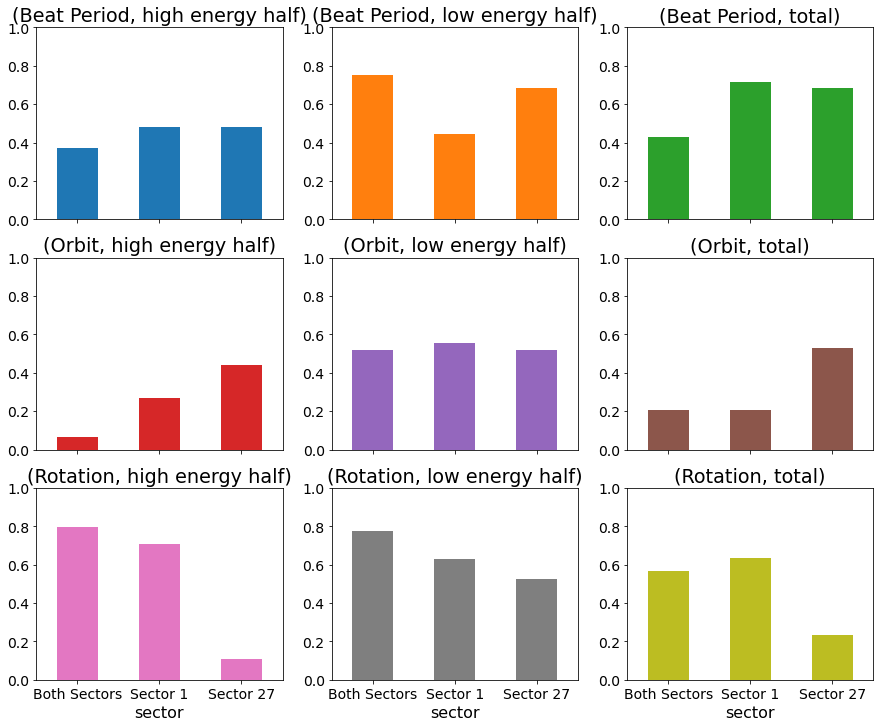

In [8]:
f = df.groupby(["period", "sector","subsample"]).p.median()
f.unstack(level=0).unstack(level=1).plot(kind='bar', subplots=True, rot=0, 
                                         figsize=(15, 12), layout=(3, 3), legend=False,
                                         ylim=(0,1));

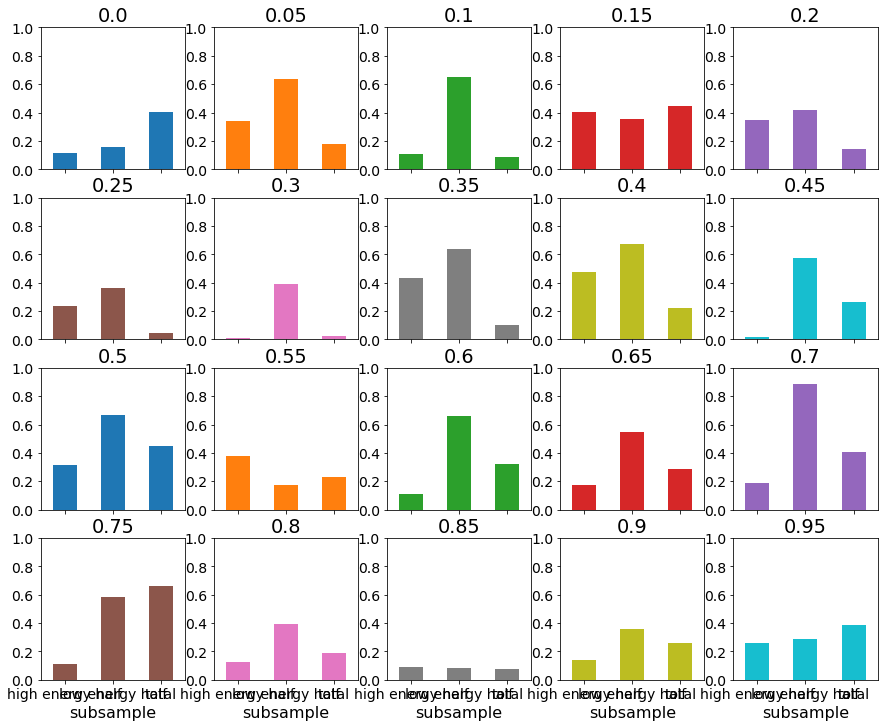

In [9]:
f = df[df.period == "Orbit"].groupby(["shift","subsample"]).p.median()
f.unstack(level=0).plot(kind='bar', subplots=True, rot=0, 
                                         figsize=(15, 12), layout=(4, 5), legend=False,
                                         ylim=(0,1));

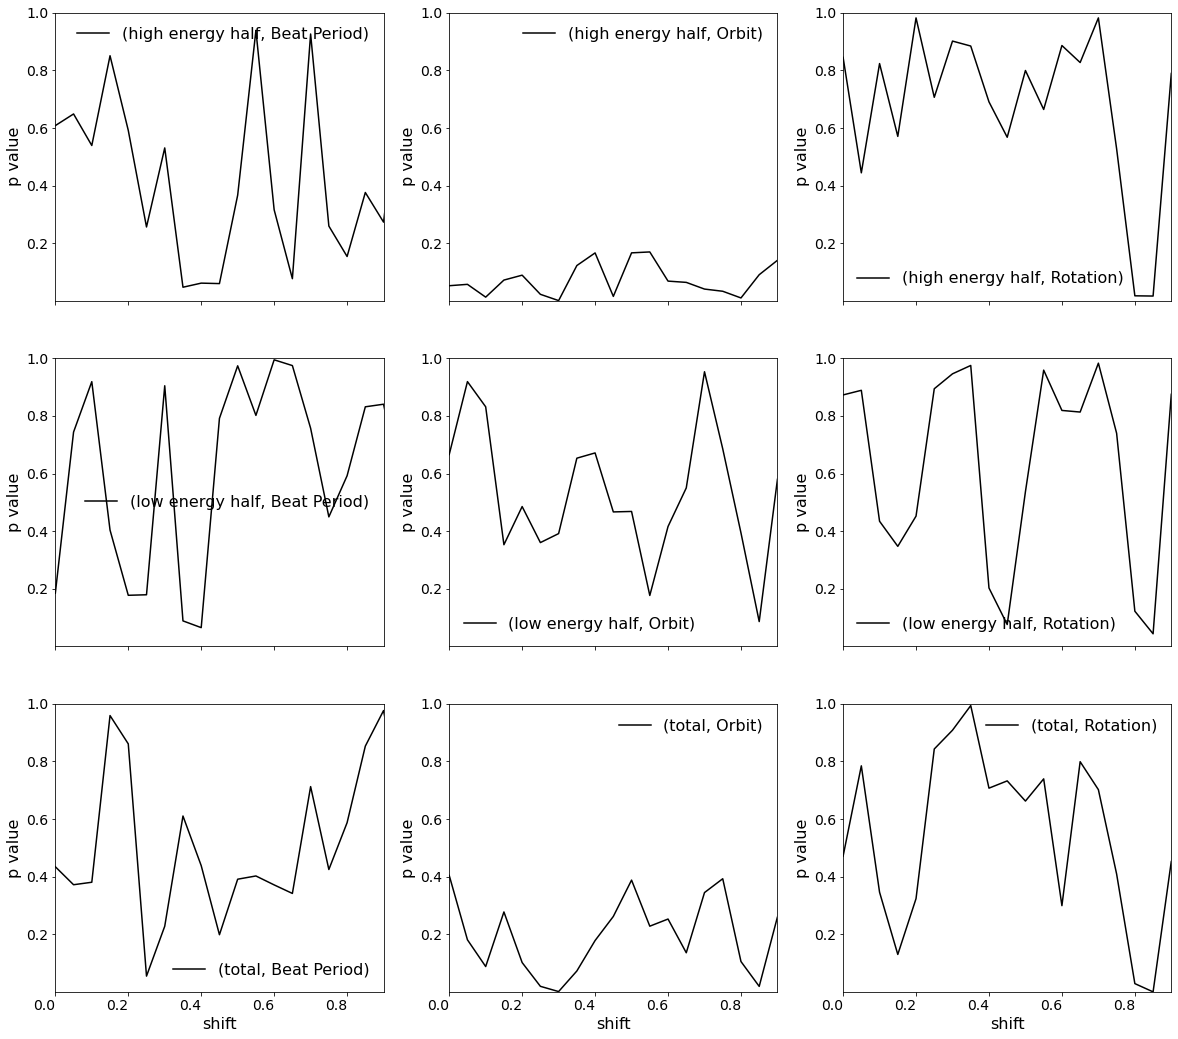

In [10]:
f = df[df.sector=="Both Sectors"].groupby(["shift","period","subsample"]).p.median()
axes = f.unstack(level=2).unstack(level=1).plot(kind='line', subplots=True, rot=0, 
                                         figsize=(20, 20), layout=(3, 3), legend=False,
                                         ylim=(1e-3,1),xlim=(0,.9),logy=False, color="k",ylabel="p value");
[ax.legend(frameon=False) for ax_ in axes for ax in ax_];